## The multinomial logistic regression runs on similar grounds as simple logistic regression. 
## The only difference between them is that logistic regression categorizes data into two categories whereas multinomial categorizes data into three or more categories

In [4]:
#importing the libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [5]:
#loading the dataset
dataset=pd.read_csv("iris.csv")

In [6]:
print(dataset)

     5.1  3.5  1.4  0.2     Iris-setosa
0    4.9  3.0  1.4  0.2     Iris-setosa
1    4.7  3.2  1.3  0.2     Iris-setosa
2    4.6  3.1  1.5  0.2     Iris-setosa
3    5.0  3.6  1.4  0.2     Iris-setosa
4    5.4  3.9  1.7  0.4     Iris-setosa
..   ...  ...  ...  ...             ...
144  6.7  3.0  5.2  2.3  Iris-virginica
145  6.3  2.5  5.0  1.9  Iris-virginica
146  6.5  3.0  5.2  2.0  Iris-virginica
147  6.2  3.4  5.4  2.3  Iris-virginica
148  5.9  3.0  5.1  1.8  Iris-virginica

[149 rows x 5 columns]


In [3]:
#assigning input and target values
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:, -1]

In [4]:
print(X)

     5.1  3.5  1.4  0.2
0    4.9  3.0  1.4  0.2
1    4.7  3.2  1.3  0.2
2    4.6  3.1  1.5  0.2
3    5.0  3.6  1.4  0.2
4    5.4  3.9  1.7  0.4
..   ...  ...  ...  ...
144  6.7  3.0  5.2  2.3
145  6.3  2.5  5.0  1.9
146  6.5  3.0  5.2  2.0
147  6.2  3.4  5.4  2.3
148  5.9  3.0  5.1  1.8

[149 rows x 4 columns]


In [5]:
print(Y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
144    Iris-virginica
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
Name: Iris-setosa, Length: 149, dtype: object


In [7]:
#creating the multinomial logistic regression model
regressor = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')
regressor.fit(X, Y)

LogisticRegression(multi_class='multinomial', random_state=0,
                   solver='newton-cg')

In [8]:
#evaluating the score of the model
score = regressor.score(X, Y)
print(score)

0.9731543624161074


In [9]:
from sklearn.model_selection import train_test_split

#split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [10]:
model1 = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')

model1.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=0,
                   solver='newton-cg')

In [11]:
model1.score(X_test,y_test)

0.9666666666666667

[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]


<AxesSubplot:title={'center':'Confusion Matrix testing data'}>

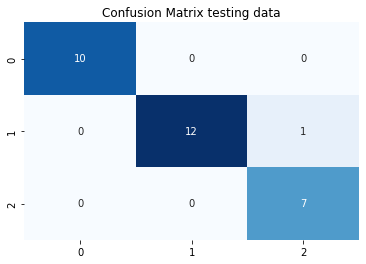

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
y_pred = model1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.title("Confusion Matrix testing data")

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cbar=False,cmap='Blues')

In [13]:
from sklearn.metrics import classification_report
target_names = ['sentosa','versicolor','verginica']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     sentosa       1.00      1.00      1.00        10
  versicolor       1.00      0.92      0.96        13
   verginica       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

